# Correlação em Python

Os valores de correlação variam entre `-1` e `1`

Existem dois componentes principais de um valor de correlação:

- **magnitude** - Quanto maior a magnitude (mais próxima de 1 ou -1), mais forte a correlação
- **sinal** - Se negativo, há uma correlação inversa. Se positivo, há uma correlação regular.

## Correlação Positiva

Vamos dar uma olhada em uma correlação positiva. NumPy implementa uma função `corrcoef()` que retorna uma matriz de correlações de:

- x com x
- x com y
- y com x 
- y com y

Estamos interessados nos valores da correlação de x com y (então posição (1, 0) ou (0, 1)).

In [32]:
import numpy as np

np.random.seed(1)

# 1000 inteiros aleatórios entre 0 e 50
x = np.random.randint(0, 50, 1000)

# Correlações positivas com ruídos
y = x + np.random.normal(0, 10, 1000)

np.corrcoef(x, y)

array([[1.        , 0.81543901],
       [0.81543901, 1.        ]])

Essa correlação é **0.81543901**, uma forte correlação positiva, vejamos um gráfico de dispersão

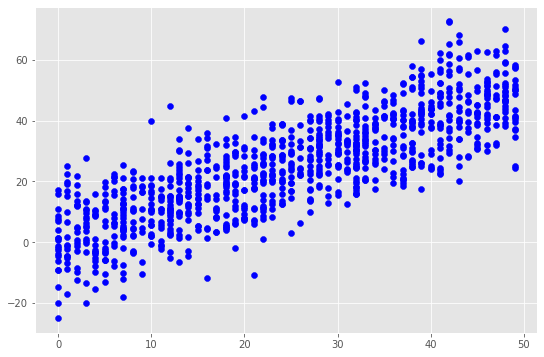

In [33]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

plt.figure(figsize=(9,6))
plt.scatter(x, y, color='blue')
plt.show()

## Correlação Negativa

O que acontece com a nossa figura de correlação se invertermos a correlação, de modo que um aumento em `x` resulte em uma diminuição em `y` ?

In [34]:
# 1000 inteiros aleatórios entre 0 e 50
x = np.random.randint(0, 50, 1000)

# Correlações negativas com ruídos
y = 100 - x + np.random.normal(0, 5, 1000)

np.corrcoef(x, y)

array([[ 1.        , -0.94957116],
       [-0.94957116,  1.        ]])

Agora, nossa correlação é negativa e próxima a 1. Vejamos graficamente como ficará a representação

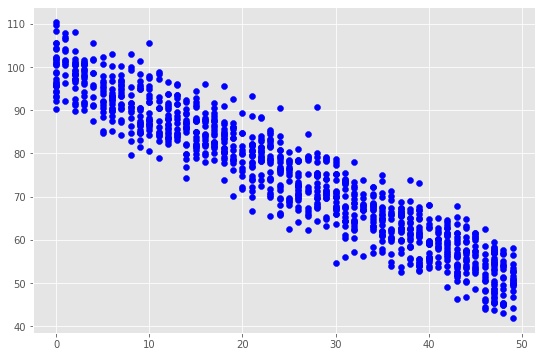

In [35]:
plt.figure(figsize=(9,6))
plt.scatter(x, y, color='blue')
plt.show()

## Nenhuma Correlação ou Correlação Fraca

E se não houver nenhuma correlação entre `x` e `y` ?

In [36]:
x = np.random.randint(0, 50, 1000)
y = np.random.randint(0, 50, 1000)

np.corrcoef(x, y)

array([[ 1.        , -0.00554681],
       [-0.00554681,  1.        ]])

Veja que obtemos um valor muito pequeno para a correlação entre `x` e `y`, indicando ausência de correlação.

Vamos projetar nosso gráfico para termos uma ideia melhor da distribuição dos dados

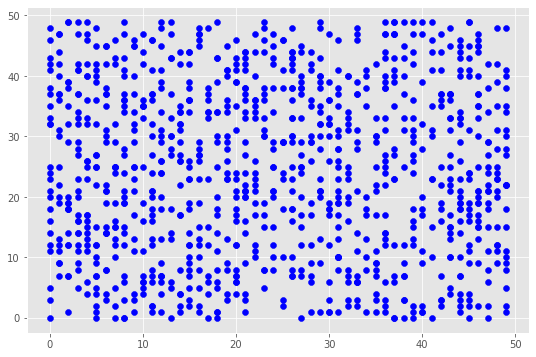

In [37]:
plt.figure(figsize=(9,6))
plt.scatter(x, y, color='blue')
plt.show()

## Matriz de Correlação

Caso estejamos utilizando a biblioteca Pandas, podemos criar uma matriz de correlação para visualizar as correlações entre diferentes variáveis em um DataFrame.

Primeiramente vamos criar um conjunto de dados para trabalharmos

In [16]:
import pandas as pd

df = pd.DataFrame({'a': np.random.randint(0, 50, 1000)})
df['b'] = df['a'] + np.random.normal(0, 10, 1000) # correlacionado positivamente com 'a'
df['c'] = 100 - df['a'] + np.random.normal(0, 5, 1000) # correlacionado negativamente com 'a'
df['d'] = np.random.randint(0, 50, 1000) # não correlacionado com 'a'

# Visualizando o conjunto de dados
df.head(10)

,a,b,c,d
0,36,47.523289,66.593769,48
1,9,27.573874,94.659326,36
2,8,9.435116,95.490455,6
3,31,21.192003,71.225255,3
4,41,27.153153,53.534441,18
5,17,27.591089,87.270769,15
6,4,13.322113,104.533536,42
7,24,29.942519,76.119727,49
8,5,10.772019,92.576363,39
9,38,53.516187,45.515353,11


O método `corr()` nos mostra a matriz de correlação

In [15]:
df.corr()

,a,b,c,d
a,1.000000,0.826340,-0.949486,-0.038949
b,0.826340,1.000000,-0.786250,-0.032221
c,-0.949486,-0.786250,1.000000,0.034521
d,-0.038949,-0.032221,0.034521,1.000000


Nós podemos também ver essas correlações graficamente através de uma matriz de dispersão

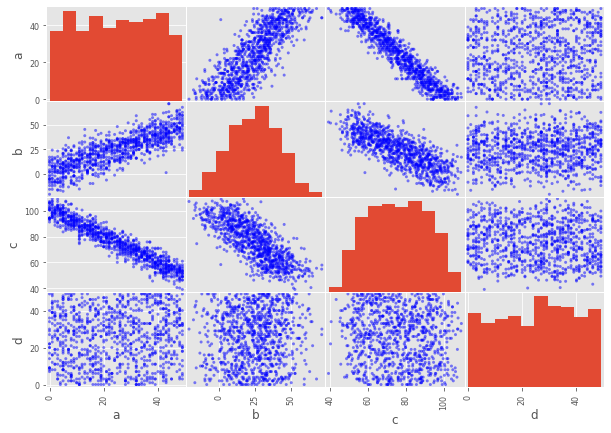

In [31]:
pd.plotting.scatter_matrix(df, figsize=(10, 7), color='blue')
plt.show()

Podemos também plotar diretamente um gráfico de matriz de correlação

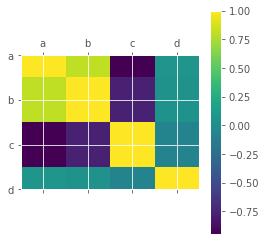

In [26]:
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()